In [84]:
import pydpmd as dp
from pydpmd.plot import draw_particles_frame, create_animation, downsample, draw_circle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from mode_resources import *
from system_building_resources import *
from matplotlib.colors import LogNorm

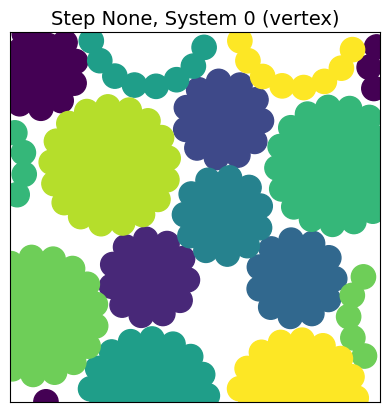

In [21]:
data = dp.data.load('/home/mmccraw/dev/data/11-15-25/jamming/rb/mu-0.5-nv-11/jamming_9', location=['final', 'init'])
draw_particles_frame(None, plt.gca(), data, 0, True, 'vertex', 'viridis', None)

In [22]:
H_list, M_list, val_list, vec_list, non_rattler_id_list = get_dynamical_matrix_modes_for_rigid_bumpy(data, 4, True)

100%|██████████| 1/1 [00:00<00:00, 320.49it/s]


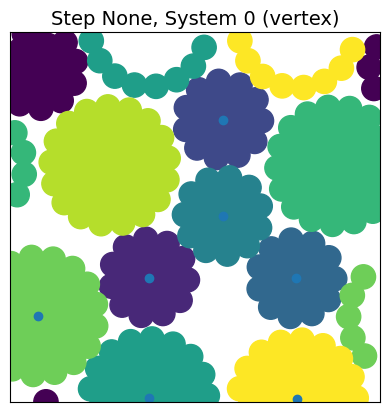

In [24]:
draw_particles_frame(None, plt.gca(), data, 0, True, 'vertex', 'viridis', None)
plt.scatter(*np.mod(data.pos[data.system_id == 0][non_rattler_id_list[0]], data.box_size[0]).T)

In [26]:
non_rattler_id_list[0].size
val_list[0]

array([-9.07210362e-16, -6.47101873e-16,  5.57475321e-02,  1.23399686e-01,
        2.26816371e-01,  7.65274306e-01,  8.54940289e-01,  1.16535811e+00,
        1.34035654e+00,  1.60776339e+00,  1.70079726e+00,  2.52637054e+00,
        2.95289590e+00,  3.28520657e+00,  3.85016867e+00,  3.99824637e+00,
        4.75759671e+00,  5.36183282e+00,  6.06208419e+00,  7.73707736e+00,
        8.30975537e+00])

In [74]:
sid = 0
N = len(non_rattler_id_list[sid])
V = vec_list[sid].copy()
L = val_list[sid].copy()
M = M_list[sid].copy()
m = get_eimask(L)

# V = V[:, m]

# orthogonality condition:
(np.sqrt(M) @ V).T @ (np.sqrt(M) @ V)
V.T @ M @ V

array([[ 1.00000000e+00, -1.55072443e-16,  1.14912328e-16,
         5.02065894e-16,  4.90238293e-17,  1.37644984e-16,
         1.48999762e-16,  1.19178026e-17, -3.89387880e-18,
        -1.30994126e-16, -2.61558396e-16, -7.30448421e-17,
         7.77516421e-17,  1.62757113e-16,  3.22169680e-16,
         2.45429734e-16, -1.09416860e-16, -6.40462842e-18,
         8.37215416e-17,  1.21449074e-17, -2.05679639e-17],
       [-1.55072443e-16,  1.00000000e+00,  2.56531651e-16,
        -7.61862189e-17, -1.69045039e-16, -7.36205837e-17,
        -3.87681908e-17,  1.89493015e-16,  2.34528502e-16,
         4.70456221e-17, -1.00362766e-16,  7.09035196e-17,
        -5.22115332e-17, -1.02728244e-16, -1.56868185e-16,
         1.68219385e-16, -5.51067470e-17,  1.78974241e-16,
        -1.39249603e-17,  1.41618866e-16,  6.24207324e-17],
       [ 1.14912328e-16,  2.56531651e-16,  1.00000000e+00,
         2.51940475e-16,  1.56517170e-16, -2.27913921e-16,
         4.25182559e-17,  3.18068463e-17,  2.64188150e

/tmp/ipykernel_177644/3561210874.py:18: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(L), participation_ratio)
/tmp/ipykernel_177644/3561210874.py:19: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(L), participation_ratio_x)
/tmp/ipykernel_177644/3561210874.py:20: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(L), participation_ratio_y)
/tmp/ipykernel_177644/3561210874.py:21: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(L), participation_ratio_t)


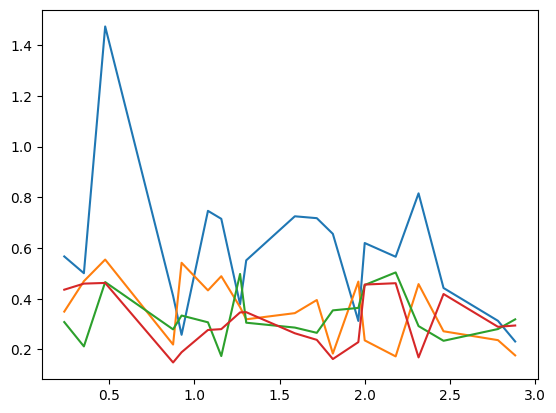

In [75]:
participation_ratio = np.array([
    np.sum((V[:, i] * np.diag(M) * V[:, i]) ** 2) ** 2 / np.sum(N * (V[:, i] * np.diag(M) * V[:, i]) ** 4)
    for i in range(V.shape[1])
])
participation_ratio_x = np.array([
    np.sum((V[:N, i] * np.diag(M)[:N] * V[:N, i]) ** 2) ** 2 / np.sum(N * (V[:N, i] * np.diag(M)[:N] * V[:N, i]) ** 4)
    for i in range(V.shape[1])
])
participation_ratio_y = np.array([
    np.sum((V[N:2*N, i] * np.diag(M)[N:2*N] * V[N:2*N, i]) ** 2) ** 2 / np.sum(N * (V[N:2*N, i] * np.diag(M)[N:2*N] * V[N:2*N, i]) ** 4)
    for i in range(V.shape[1])
])
participation_ratio_t = np.array([
    np.sum((V[2*N:, i] * np.diag(M)[2*N:] * V[2*N:, i]) ** 2) ** 2 / np.sum(N * (V[2*N:, i] * np.diag(M)[2*N:] * V[2*N:, i]) ** 4)
    for i in range(V.shape[1])
])

plt.plot(np.sqrt(L), participation_ratio)
plt.plot(np.sqrt(L), participation_ratio_x)
plt.plot(np.sqrt(L), participation_ratio_y)
plt.plot(np.sqrt(L), participation_ratio_t)

/tmp/ipykernel_177644/789798643.py:8: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(L), translational_content)
/tmp/ipykernel_177644/789798643.py:9: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(L), rotational_content)


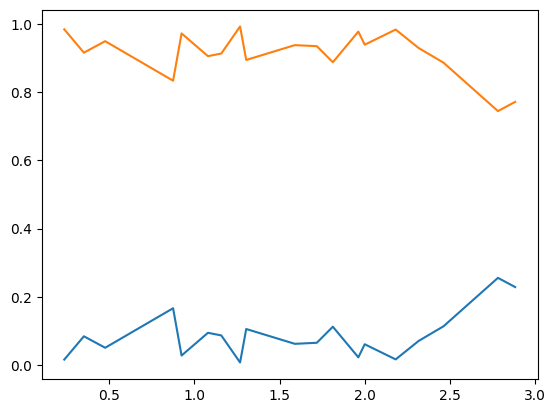

In [76]:
translational_content = np.array([
    np.sum((V[:2*N, i] * np.diag(M)[:2*N] * V[:2*N, i]) ** 2)
    for i in range(V.shape[1])
])

rotational_content = 1 - translational_content

plt.plot(np.sqrt(L), translational_content)
plt.plot(np.sqrt(L), rotational_content)

/tmp/ipykernel_177644/3871645247.py:6: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(L), optical_order)


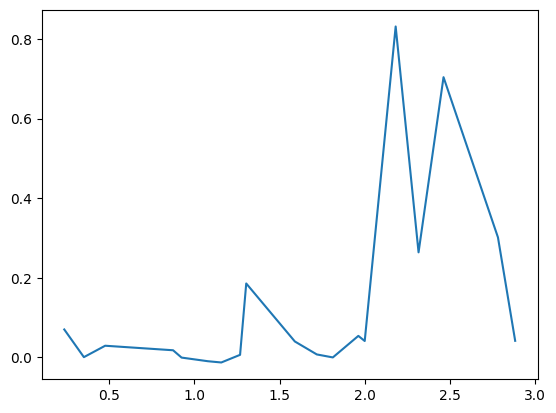

In [77]:
optical_order = np.array([
    np.sum(V[2*N:, i, None] * np.diag(M)[2*N:] * V[2*N:, i]) / np.sum(N * V[2*N:, i] * np.diag(M)[2*N:] * V[2*N:, i])
    for i in range(V.shape[1])
])

plt.plot(np.sqrt(L), optical_order)

In [31]:
# v = np.column_stack((v[:N, i], v[N:2*N, i], v[2*N:, i]))

100%|██████████| 1/1 [00:00<00:00, 490.16it/s]
/tmp/ipykernel_177644/1948733934.py:50: RuntimeWarning: invalid value encountered in sqrt
  ax[0].plot(np.sqrt(L), participation_ratio, c=cmap(mu_norm(mu)))
/tmp/ipykernel_177644/1948733934.py:57: RuntimeWarning: invalid value encountered in sqrt
  ax[1].plot(np.sqrt(L), rotational_content / translational_content, c=cmap(mu_norm(mu)))
/tmp/ipykernel_177644/1948733934.py:59: RuntimeWarning: invalid value encountered in sqrt
  ax[2].plot(np.sqrt(L), optical_order, c=cmap(mu_norm(mu)))
100%|██████████| 1/1 [00:00<00:00, 601.25it/s]


100%|██████████| 1/1 [00:00<00:00, 524.88it/s]


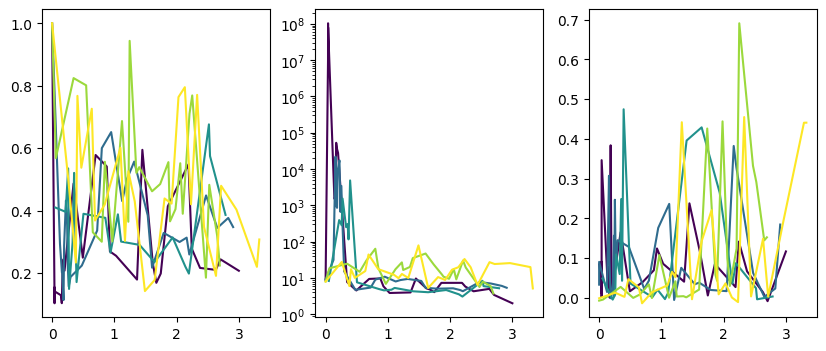

In [106]:
mu_list = [0.01, 0.05, 0.1, 0.5, 1.0]

mu_norm = LogNorm(vmin=np.min(mu_list), vmax=np.max(mu_list))
cmap = plt.cm.viridis

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for mu in mu_list:
    path = f'/home/mmccraw/dev/data/11-15-25/jamming/rb/mu-{mu}-nv-5/jamming_9'
    data = dp.data.load(path, location=['final', 'init'])

    H_list, M_list, val_list, vec_list, non_rattler_id_list = get_dynamical_matrix_modes_for_rigid_bumpy(data, 4, True)

    sid = 0
    N = len(non_rattler_id_list[sid])
    V = vec_list[sid].copy()
    L = val_list[sid].copy()
    M = M_list[sid].copy()
    m = get_eimask(L)

    participation_ratio = np.array([
        np.sum((V[:, i] * np.diag(M) * V[:, i]) ** 2) ** 2 / np.sum(N * (V[:, i] * np.diag(M) * V[:, i]) ** 4)
        for i in range(V.shape[1])
    ])
    participation_ratio_x = np.array([
        np.sum((V[:N, i] * np.diag(M)[:N] * V[:N, i]) ** 2) ** 2 / np.sum(N * (V[:N, i] * np.diag(M)[:N] * V[:N, i]) ** 4)
        for i in range(V.shape[1])
    ])
    participation_ratio_y = np.array([
        np.sum((V[N:2*N, i] * np.diag(M)[N:2*N] * V[N:2*N, i]) ** 2) ** 2 / np.sum(N * (V[N:2*N, i] * np.diag(M)[N:2*N] * V[N:2*N, i]) ** 4)
        for i in range(V.shape[1])
    ])
    participation_ratio_t = np.array([
        np.sum((V[2*N:, i] * np.diag(M)[2*N:] * V[2*N:, i]) ** 2) ** 2 / np.sum(N * (V[2*N:, i] * np.diag(M)[2*N:] * V[2*N:, i]) ** 4)
        for i in range(V.shape[1])
    ])

    translational_content = np.array([
        np.sum((V[:2*N, i] * np.diag(M)[:2*N] * V[:2*N, i]) ** 2)
        for i in range(V.shape[1])
    ])

    rotational_content = 1 - translational_content

    optical_order = np.array([
        np.sum(V[2*N:, i, None] * np.diag(M)[2*N:] * V[2*N:, i]) / np.sum(N * V[2*N:, i] * np.diag(M)[2*N:] * V[2*N:, i])
        for i in range(V.shape[1])
    ])

    ax[0].plot(np.sqrt(L), participation_ratio, c=cmap(mu_norm(mu)))
    # ax[0].plot(np.sqrt(L), participation_ratio_x)
    # ax[0].plot(np.sqrt(L), participation_ratio_y)
    # ax[0].plot(np.sqrt(L), participation_ratio_t)

    # ax[1].plot(np.sqrt(L), translational_content, c=cmap(mu_norm(mu)))
    # ax[1].plot(np.sqrt(L), rotational_content, c=cmap(mu_norm(mu)), linestyle='--')
    ax[1].plot(np.sqrt(L), rotational_content / translational_content, c=cmap(mu_norm(mu)))

    ax[2].plot(np.sqrt(L), optical_order, c=cmap(mu_norm(mu)))

ax[1].set_yscale('log')